In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
tf.random.set_seed(0)

Polynomial regression is used to find relationships with non-linear data, as in the case of a sinusoidal wave. The objective of this project is to build a polynomial regression model that can find the curve that best fits the observed data.

The data (sinusoidal x values) we are working with is linear, with 100 data points in the range from 0 to 2π (2π is a full cycle of a sinusoidal wave). The data is then transformed to a nonlinear, polynomial representation via the poly_transform() method seen below.

The labels (sinusoidal y values) were calculated from the original, linear data, along with some added noise to allow the model to train on somewhat imperfect data.

In [48]:
# Convert data to a polynomial representation
def poly_transform(degree, data):
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly = poly.fit_transform(data.reshape(-1, 1))
  return X_poly

In [49]:
# Generate sinusoidal data
x_range = np.linspace(0, 2*np.pi, 100)
x_train = tf.constant(poly_transform(degree=3, data=x_range), dtype=tf.float32)
y_sin = np.sin(x_range) + np.random.normal(loc=0.0, scale=0.1, size=x_range.shape)
y_train = tf.constant(y_sin.reshape(-1, 1), dtype=tf.float32)

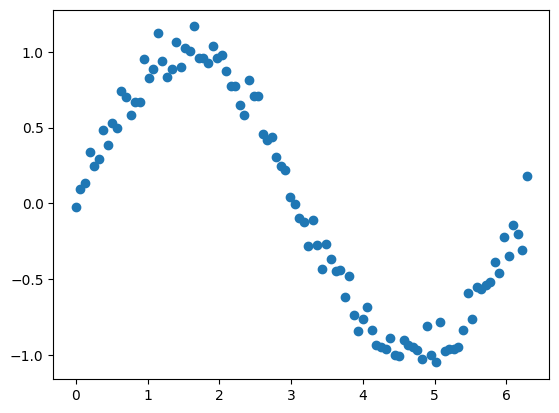

In [50]:
# Plot original data to visualize sinusoidal wave
plt.scatter(x_range, y_sin)

The model was built using TensorFlow's tf.Module class. The weights are created in the same polynomial degree as the data. Both the weights and biases were centered around a mean of 0.0 and a standard deviation of 0.1 for more control over the random initialization. The prediction method is the simple transformation from inputs to outputs.

A simple loss function was also implemented, using the Mean Squared Error (MSE).

In [51]:
# Build the model
class PolyRegression(tf.Module):
  def __init__(self, degree):
    super().__init__()
    self.w = tf.Variable(tf.random.normal(shape=(degree, 1), mean=0.0, stddev=0.1), tf.float32, name = 'w')
    self.b = tf.Variable(tf.random.normal(shape=(1,), mean=0.0, stddev=0.1), tf.float32, name = 'b')

  def __call__(self, x):
    return tf.matmul(x, self.w) + self.b

In [52]:
# Define a loss function
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

To train the model, the method below utilizes tf.GradientTape for automatic differentiation. The relevant operations (calculating outputs from inputs and the error) were included in the tape to perform differentiation and then optimize the model's variables to reduce the loss function.

Finally, the train() model was called for each iteration of epochs to predict the y, calculate the loss between predicted y and actual y, and update the weights and biases. There is not really a test set in this case, given we are trying to find the fitted curve for the data, so the model is tested again on the training data and the predicted y is plotted as a curve to visualize the fit the model produced for the data.

In [53]:
# Training per epoch
def train(model, x_train, y_train, optimizer):
  with tf.GradientTape() as tape:
    y_pred = model(x_train)
    curr_loss = loss(y_train, y_pred)
  gradients = tape.gradient(curr_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return curr_loss

In [54]:
# Training loop
losses = []
degree = 3
model = PolyRegression(degree)
epochs = 1500
optimizer = tf.optimizers.Adam(learning_rate=0.1)

for epoch in range(epochs):
  curr_loss = train(model, x_train, y_train, optimizer)
  losses.append(curr_loss)
  if epoch % 100 == 0:
    print(f'Epoch {epoch}:')
    print(f'w = {model.w.numpy()[0][0]:1.2f}, b = {model.b.numpy()[0]:1.2f}, loss = {curr_loss.numpy():1.2f}')

Epoch 0:
w = 0.25, b = 0.21, loss = 5.82
Epoch 100:
w = 0.02, b = 0.46, loss = 0.22
Epoch 200:
w = 0.01, b = 0.82, loss = 0.14
Epoch 300:
w = 0.08, b = 0.89, loss = 0.12
Epoch 400:
w = 0.18, b = 0.84, loss = 0.11
Epoch 500:
w = 0.30, b = 0.77, loss = 0.10
Epoch 600:
w = 0.43, b = 0.70, loss = 0.08
Epoch 700:
w = 0.55, b = 0.63, loss = 0.07
Epoch 800:
w = 0.68, b = 0.55, loss = 0.06
Epoch 900:
w = 0.80, b = 0.47, loss = 0.05
Epoch 1000:
w = 0.92, b = 0.40, loss = 0.04
Epoch 1100:
w = 1.04, b = 0.33, loss = 0.04
Epoch 1200:
w = 1.15, b = 0.27, loss = 0.03
Epoch 1300:
w = 1.25, b = 0.21, loss = 0.03
Epoch 1400:
w = 1.34, b = 0.16, loss = 0.02


In [55]:
# Predict curve for data
y_pred = model(x_train).numpy().flatten()

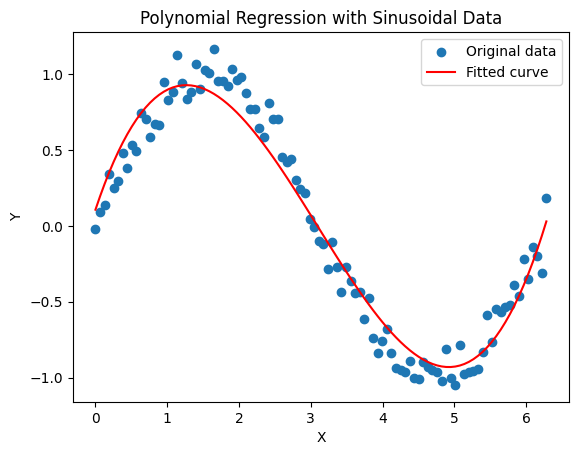

In [56]:
# Plot the predictions on the train set to observe fit
plt.scatter(x_range, y_sin, label='Original data')
plt.plot(x_range, y_pred, color='red', label='Fitted curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with Sinusoidal Data')
plt.legend()
plt.show()

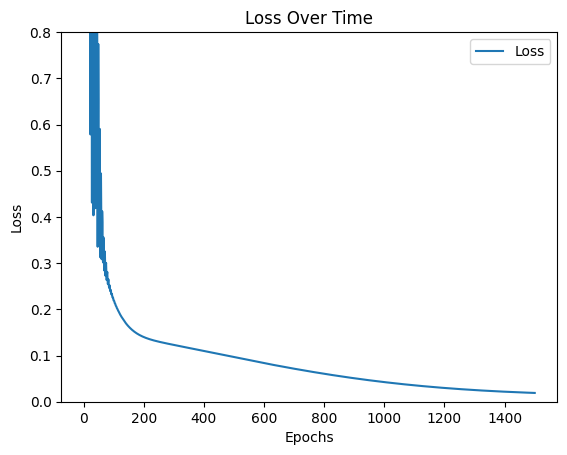

In [57]:
# Plot the loss over training
plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.ylim(0, 0.8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()